In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# NASA Astronauts, 1959-Present

### La Nasa voudrait ajuster une certaine égalité homme / femme au niveau des voyages et du temps passé dans l'espace ainsi qu'une égalité scientifique / militaire. Pour ce faire nous nous poserons ces questions:

#### - Quelles sont les ratios homme / femme pour les astronautes civiles et militaires?
#### - Quels astronautes font le plus de voyages dans l'espace? homme/femme ?


In [2]:
astronauts= pd.read_csv('c:/temp/data/astronauts.csv')
astronauts.head(5)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [3]:
astronauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

In [4]:
astronauts.describe()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


<AxesSubplot:xlabel='count', ylabel='Gender'>

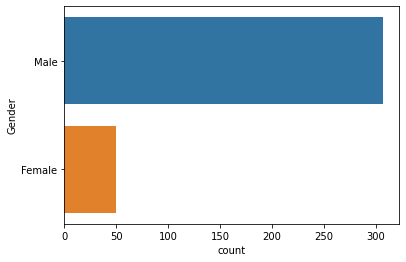

In [5]:
## Le ratio homme / femme des astronautes.
sns.countplot(y="Gender", data=astronauts)

Pour commencer cette analyse, on peut observer que le ratio de femme par rapport aux hommes est faible au niveau des 
astronautes avec enviro 50 femmes pour 300 hommes ce qui fait environ 15% de femmes astronautes.


### 1) Proportion homme / femme des militaires astronautes :

In [6]:
## Nombres d'astronautes militaires
astronauts["Military Rank"].notna().values.sum()

207

<AxesSubplot:xlabel='count', ylabel='Military Rank'>

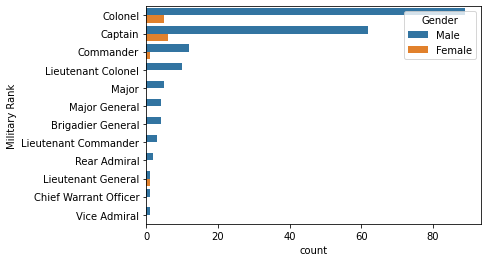

In [7]:
## Les différents grades militaire des astronautes.
sns.countplot(y="Military Rank", data=astronauts, hue=astronauts['Gender'], order=astronauts['Military Rank'].value_counts().index)

On peut voir avec ce graphique que la plus grande partie des astronautes militaire sont Colonel et Capitain (plus de 80% des cas). On peut voir également que la proportion de femmmes par rapport aux hommes est très lègére, environ 5-10% des colonel astronautes sont des femmes et 15-20% des capitaines sont femmes.

### 2) Proportion homme / femme astronautes civiles

In [8]:
## Les astronautes qui non aucun grade militaire.
astronauts["Military Rank"].isna().values.sum()

150

<AxesSubplot:xlabel='count', ylabel='Military Rank'>

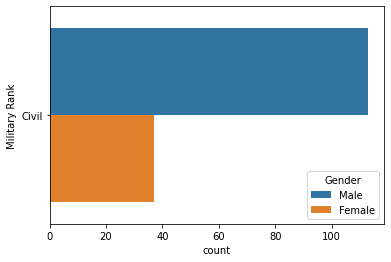

In [16]:
## Les astronautes qui non aucun grade militaire.
astronauts["Military Rank"] = astronauts["Military Rank"].fillna("Civil")
sns.countplot(y="Military Rank", data = astronauts.where(astronauts["Military Rank"] == "Civil"), hue= astronauts["Gender"])

On peut voir avec ce graphique qu'il y a plus de civiles astronautes femmes par rapport à ce qu'on avait vu avec les militaires. On a environ 25% de femmes dans ce cas la.

### 3) Les ratios homme / femmes des voyages et marches spatiaux. 

<AxesSubplot:xlabel='Space Flights', ylabel='Gender'>

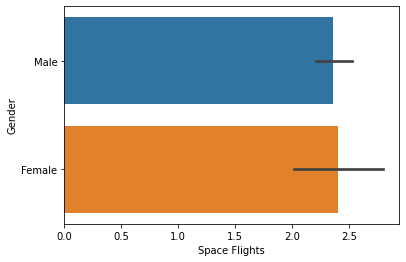

In [19]:
sns.barplot(x="Space Flights", y="Gender", data=astronauts)

<AxesSubplot:xlabel='Space Flights', ylabel='Gender'>

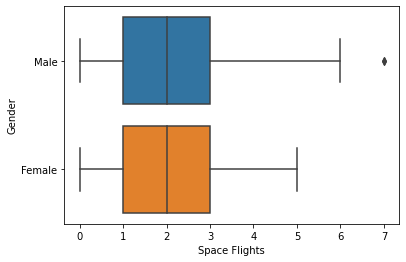

In [18]:
sns.boxplot(x="Space Flights", y="Gender", data=astronauts)

<AxesSubplot:xlabel='Space Walks', ylabel='Gender'>

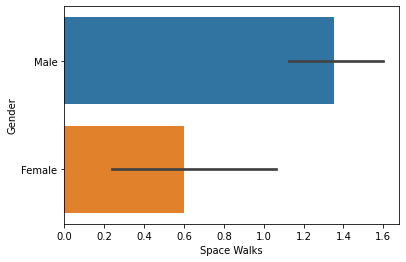

In [23]:
sns.barplot(x="Space Walks", y="Gender", data=astronauts)

<AxesSubplot:xlabel='Space Walks', ylabel='Gender'>

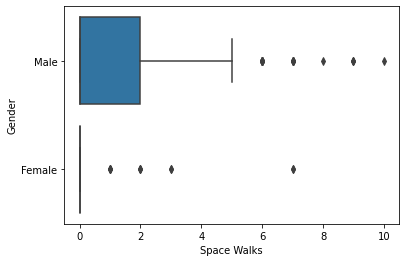

In [24]:
sns.boxplot(x="Space Walks", y="Gender", data=astronauts)